In [1]:
!pip install opencv-python
import numpy as np  # linear algebra
import cv2 # opencv
import matplotlib.pyplot as plt # image plotting
# keras
from tensorflow.keras import regularizers
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping 

In [2]:
# Load train, test and validate data set(merged manual train and test data set)
with_mask_dir='C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/dataset/train_validate/masked'
without_mask_dir='C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/dataset/train_validate/unmasked'


In [3]:
filepaths = []
labels= []
dict_list = [with_mask_dir, without_mask_dir]
for i, j in enumerate(dict_list):
    print(i)
    print(j)
    flist=os.listdir(j)
    #print(flist)
    for f in flist:
        fpath=os.path.join(j,f)
        filepaths.append(fpath)
        if i==0:
          labels.append('with_mask')
        else:
          labels.append('without_mask') 

0
C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/dataset/train_validate/masked
1
C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/dataset/train_validate/unmasked


In [4]:
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")

In [5]:
mask_data = pd.concat([Fseries,Lseries], axis=1)

In [6]:
mask_df = pd.DataFrame(mask_data)

In [7]:
print(mask_df.head())
print(mask_df["labels"].value_counts())

                                           filepaths     labels
0  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask
1  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask
2  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask
3  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask
4  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask
with_mask       887
without_mask    840
Name: labels, dtype: int64


In [8]:
mask_df.head()

,filepaths,labels
0,C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...,with_mask
1,C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...,with_mask
2,C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...,with_mask
3,C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...,with_mask
4,C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...,with_mask


In [9]:
#shape of datatset
mask_df.shape

(1727, 2)

In [10]:
mask_df.columns

Index(['filepaths', 'labels'], dtype='object')

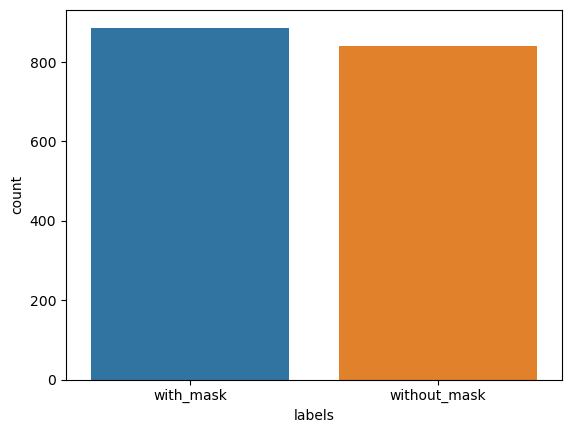

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# count plot on single categorical variable
sns.countplot(x ='labels', data = mask_df)
 
# Show the plot
plt.show()

In [12]:
train_set, test_images = train_test_split(mask_df, test_size=0.3, random_state=42)
test_set, val_set = train_test_split(test_images, test_size=0.2, random_state=42)

In [13]:
#Generate batches of tensor image data with real-time data augmentation.
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)

train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(64,64),
                                      
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            #do not shuffle data
                                     )

test = image_gen.flow_from_dataframe(dataframe= test_set,x_col="filepaths", y_col="labels",
                                     target_size=(64,64),
                                     
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(64,64),
                                   
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 1208 validated image filenames belonging to 2 classes.
Found 415 validated image filenames belonging to 2 classes.
Found 104 validated image filenames belonging to 2 classes.


In [14]:
classes=list(train.class_indices.keys())
print (classes)

['with_mask', 'without_mask']


In [15]:
def show_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator 
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

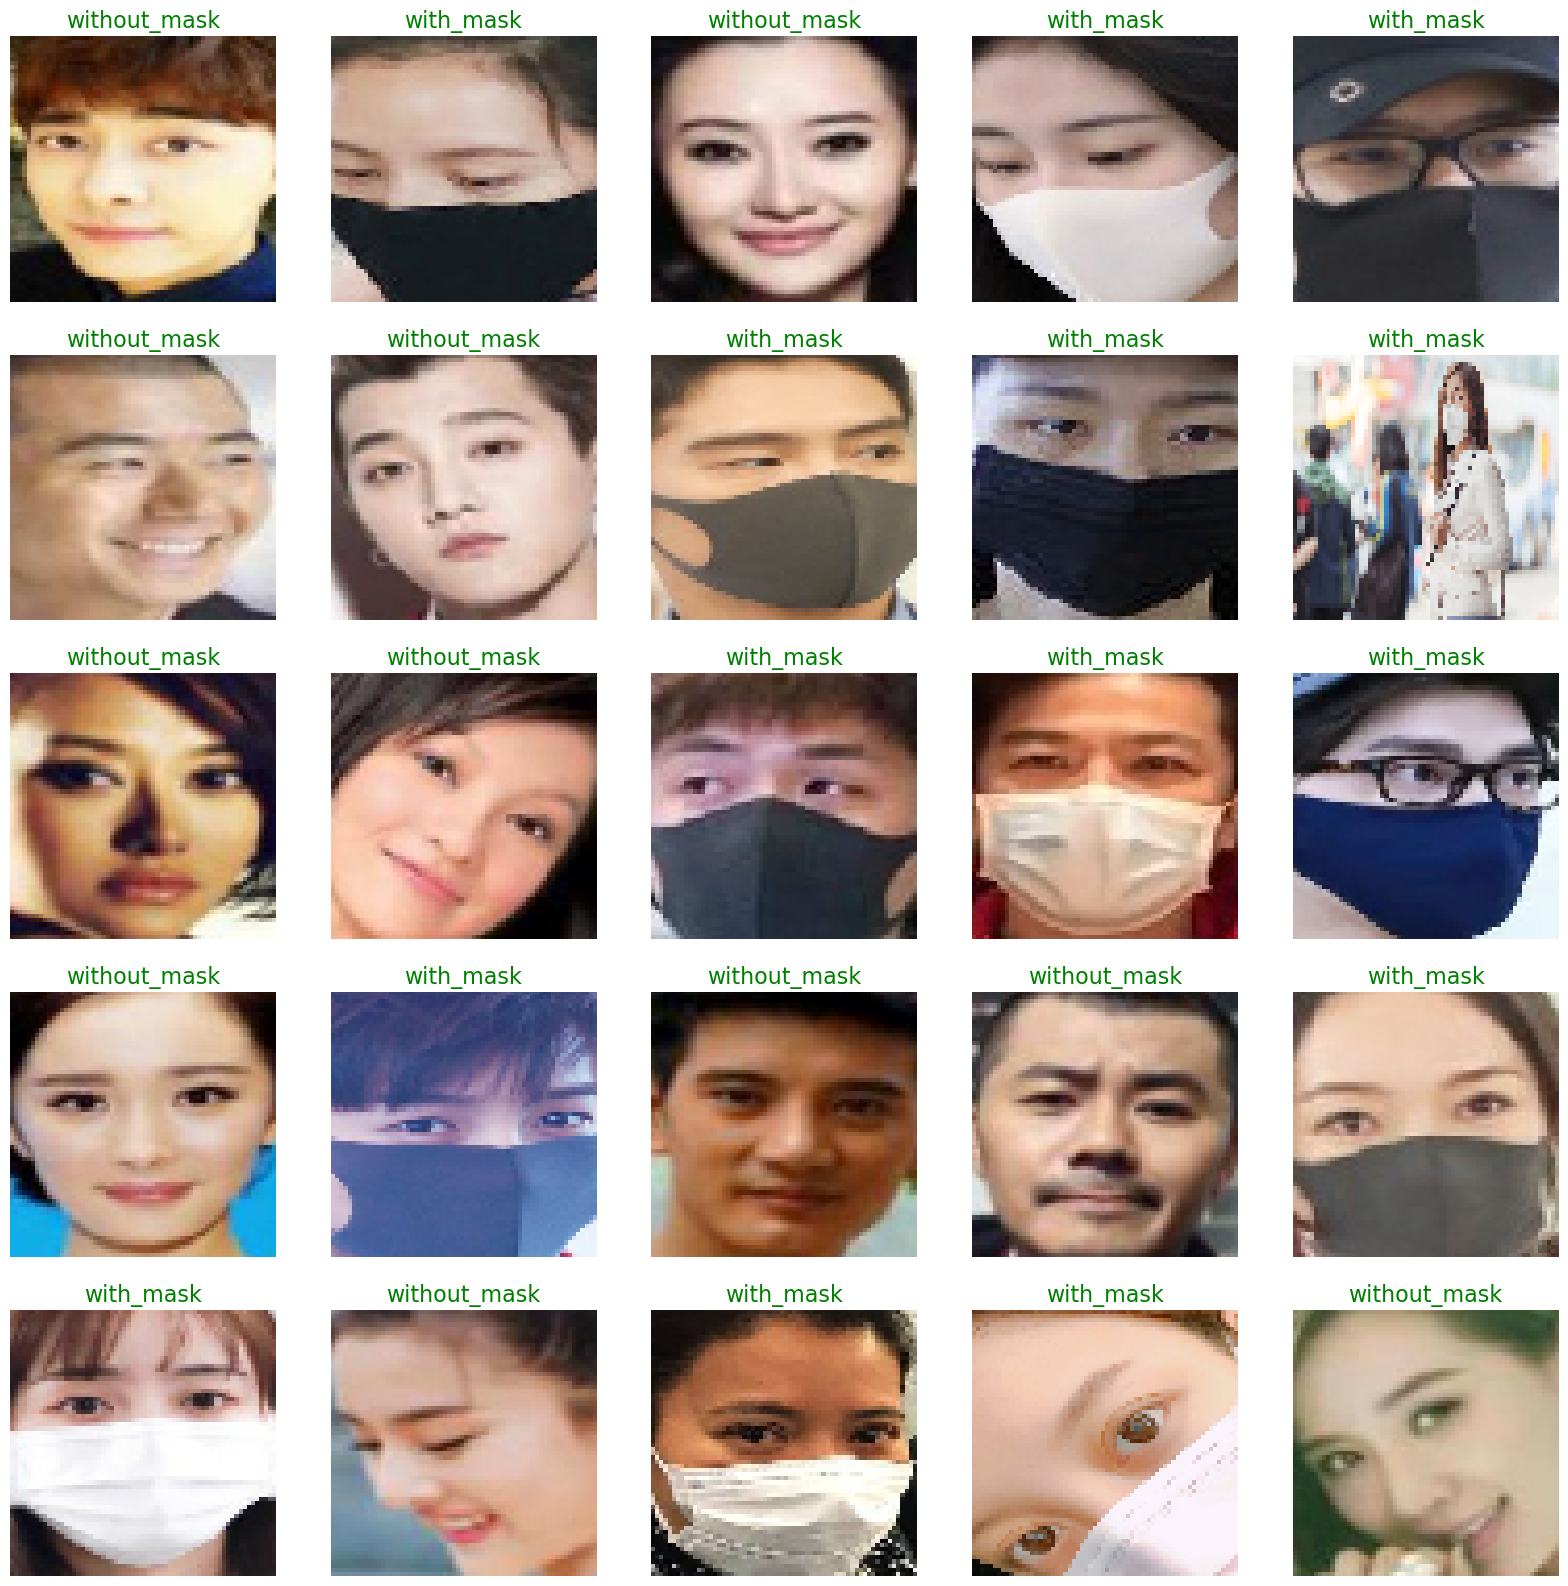

In [16]:
show_images(train)

In [17]:
def plot_loss_and_accuracy(history):
    history_df = pd.DataFrame(history)
    history_df.loc[0:, ['loss', 'val_loss']].plot()
    history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

# 2. Configure the CNN model (use keras tensorflow), an indicative (minimal) configuration is as below. Take activation function (A)=relu. Feel free to use standard values for anything that is not mentioned (eg, take pool size 2x2, filter size 3x3, and so on). [2 points]

In [18]:
import keras
from tensorflow.keras import layers

model_1 = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
  
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
   
    layers.Dense(2, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_1.optimizer.lr=0.001

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

# Train the CNN model for E epoch (take E=70), save the train_loss, train_acc, validation_loss, validation_acc for each epoch and plot it after training has finished. [4 points]

In [19]:
history_CNN = model_1.fit(train, validation_data= val, epochs=70,verbose=1)

Epoch 1/70
38/38 [==============================] - 8s 183ms/step - loss: 0.3292 - accuracy: 0.8651 - val_loss: 0.1450 - val_accuracy: 0.9519
Epoch 2/70
38/38 [==============================] - 6s 158ms/step - loss: 0.1313 - accuracy: 0.9553 - val_loss: 0.1174 - val_accuracy: 0.9327
Epoch 3/70
38/38 [==============================] - 6s 160ms/step - loss: 0.1002 - accuracy: 0.9694 - val_loss: 0.1133 - val_accuracy: 0.9327
Epoch 4/70
38/38 [==============================] - 7s 176ms/step - loss: 0.0842 - accuracy: 0.9719 - val_loss: 0.0977 - val_accuracy: 0.9519
Epoch 5/70
38/38 [==============================] - 6s 166ms/step - loss: 0.0610 - accuracy: 0.9826 - val_loss: 0.0690 - val_accuracy: 0.9712
Epoch 6/70
38/38 [==============================] - 6s 150ms/step - loss: 0.0525 - accuracy: 0.9834 - val_loss: 0.1439 - val_accuracy: 0.9519
Epoch 7/70
38/38 [==============================] - 7s 175ms/step - loss: 0.0561 - accuracy: 0.9801 - val_loss: 0.0838 - val_accuracy: 0.9712
Epoch 

38/38 [==============================] - 6s 156ms/step - loss: 2.2401e-05 - accuracy: 1.0000 - val_loss: 0.1543 - val_accuracy: 0.9808
Epoch 58/70
38/38 [==============================] - 6s 161ms/step - loss: 2.0700e-05 - accuracy: 1.0000 - val_loss: 0.1566 - val_accuracy: 0.9808
Epoch 59/70
38/38 [==============================] - 6s 152ms/step - loss: 2.0168e-05 - accuracy: 1.0000 - val_loss: 0.1559 - val_accuracy: 0.9808
Epoch 60/70
38/38 [==============================] - 6s 153ms/step - loss: 1.8907e-05 - accuracy: 1.0000 - val_loss: 0.1557 - val_accuracy: 0.9808
Epoch 61/70
38/38 [==============================] - 6s 150ms/step - loss: 1.8200e-05 - accuracy: 1.0000 - val_loss: 0.1572 - val_accuracy: 0.9808
Epoch 62/70
38/38 [==============================] - 6s 166ms/step - loss: 1.7394e-05 - accuracy: 1.0000 - val_loss: 0.1580 - val_accuracy: 0.9808
Epoch 63/70
38/38 [==============================] - 7s 194ms/step - loss: 1.6819e-05 - accuracy: 1.0000 - val_loss: 0.1584 - val_

In [20]:
print('Final training loss \t', history_CNN.history['loss'][-1])
print('Final training accuracy ', history_CNN.history['accuracy'][-1])

Final training loss 	 1.3011782357352786e-05
Final training accuracy  1.0


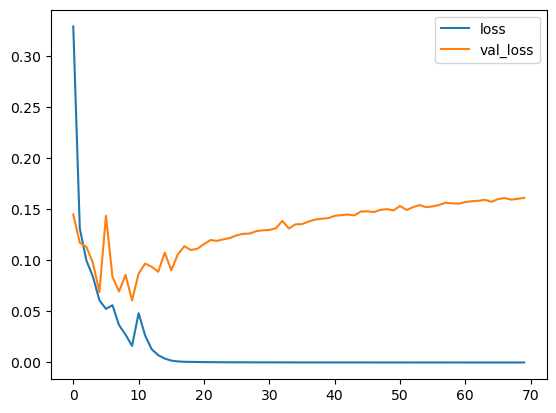

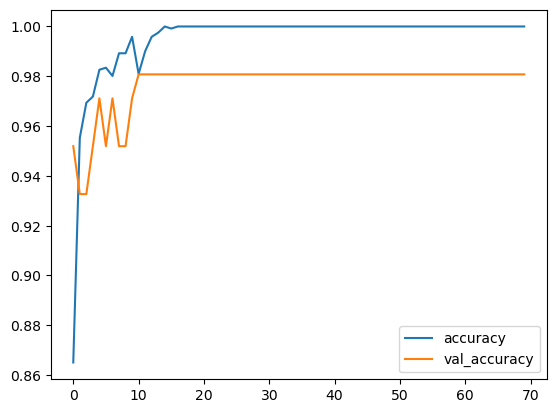

In [21]:
#resuts from model 1
plot_loss_and_accuracy(history_CNN.history)

# 4. Evaluate the trained CNN model on test data. Print classification results. [2 point]

In [22]:
pred = model_1.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2_default = [labels[k] for k in pred]

y_test_default = test_set.labels # set y_test to the expected output
print(classification_report(y_test_default, pred2_default))

13/13 [==============================] - 1s 67ms/step
              precision    recall  f1-score   support

   with_mask       0.97      0.95      0.96       208
without_mask       0.95      0.97      0.96       207

    accuracy                           0.96       415
   macro avg       0.96      0.96      0.96       415
weighted avg       0.96      0.96      0.96       415



In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [24]:
precision_default = precision_score(y_test_default, pred2_default,average='macro')
precision_default

0.9591173054587688

In [25]:
recall_default = recall_score(y_test_default, pred2_default,average='macro')
recall_default

0.959053325901152

In [26]:
f1_default = f1_score(y_test_default, pred2_default,average='macro')
f1_default

0.9590351931529837

<AxesSubplot:>

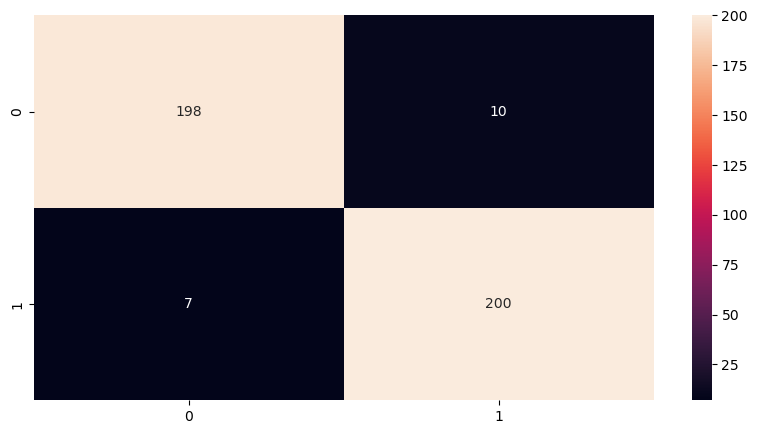

In [29]:
# model 1
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm = confusion_matrix(y_test_default, pred2_default)
sns.heatmap(cm, annot=True, fmt = 'g')

# 5. Can you try to make changes in anyway in the CNN model and improve your test accuracy? Let's call the model constructed as per step-2 above as 'default' and the improvement as 'improved' model. Plot precision and recall for default and improved model in a single bar plot. [3 points]

# Create a CNN Model With DropOuts

In [30]:
import keras
from tensorflow.keras import layers

model_dropout = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Add dropout of 50% to layer 2
    layers.Dropout(0.5),
    
    #Layer 3
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    # Add dropout of 50% to layer 3
    layers.Dropout(0.5),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

model_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_dropout.optimizer.lr=0.001

model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)       

In [ ]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 



In [31]:
history_CNN_dropout = model_dropout.fit(train, validation_data= val, epochs=70,verbose=1)

Epoch 1/70
38/38 [==============================] - 7s 154ms/step - loss: 0.4335 - accuracy: 0.7873 - val_loss: 0.2657 - val_accuracy: 0.9135
Epoch 2/70
38/38 [==============================] - 6s 165ms/step - loss: 0.2017 - accuracy: 0.9379 - val_loss: 0.2215 - val_accuracy: 0.9231
Epoch 3/70
38/38 [==============================] - 7s 175ms/step - loss: 0.1837 - accuracy: 0.9437 - val_loss: 0.2076 - val_accuracy: 0.9135
Epoch 4/70
38/38 [==============================] - 6s 156ms/step - loss: 0.1382 - accuracy: 0.9536 - val_loss: 0.1190 - val_accuracy: 0.9423
Epoch 5/70
38/38 [==============================] - 5s 141ms/step - loss: 0.1217 - accuracy: 0.9578 - val_loss: 0.1474 - val_accuracy: 0.9615
Epoch 6/70
38/38 [==============================] - 6s 144ms/step - loss: 0.1349 - accuracy: 0.9536 - val_loss: 0.1214 - val_accuracy: 0.9423
Epoch 7/70
38/38 [==============================] - 6s 144ms/step - loss: 0.1157 - accuracy: 0.9586 - val_loss: 0.2022 - val_accuracy: 0.9231
Epoch 

38/38 [==============================] - 7s 184ms/step - loss: 0.0279 - accuracy: 0.9917 - val_loss: 0.0828 - val_accuracy: 0.9808
Epoch 59/70
38/38 [==============================] - 8s 212ms/step - loss: 0.0136 - accuracy: 0.9942 - val_loss: 0.0978 - val_accuracy: 0.9808
Epoch 60/70
38/38 [==============================] - 7s 195ms/step - loss: 0.0228 - accuracy: 0.9909 - val_loss: 0.0800 - val_accuracy: 0.9808
Epoch 61/70
38/38 [==============================] - 7s 192ms/step - loss: 0.0230 - accuracy: 0.9892 - val_loss: 0.2116 - val_accuracy: 0.9615
Epoch 62/70
38/38 [==============================] - 7s 183ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.1166 - val_accuracy: 0.9712
Epoch 63/70
38/38 [==============================] - 6s 168ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.1459 - val_accuracy: 0.9615
Epoch 64/70
38/38 [==============================] - 6s 159ms/step - loss: 0.0066 - accuracy: 0.9975 - val_loss: 0.0976 - val_accuracy: 0.9712
Epoch 65/70

In [32]:
print('Final training loss \t', history_CNN_dropout.history['loss'][-1])
print('Final training accuracy ', history_CNN_dropout.history['accuracy'][-1])

Final training loss 	 0.00574771361425519
Final training accuracy  0.9958609342575073


In [33]:
def plot_loss_and_accuracy(history):
    history_df = pd.DataFrame(history)
    history_df.loc[0:, ['loss', 'val_loss']].plot()
    history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

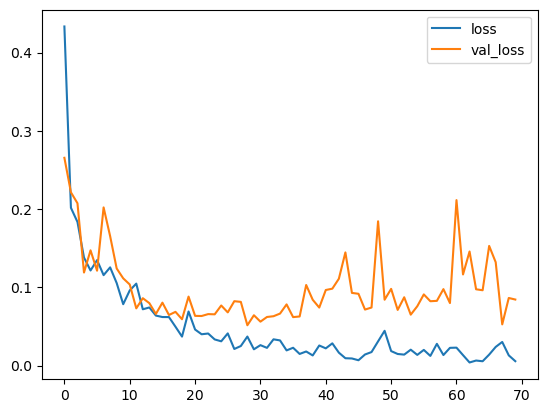

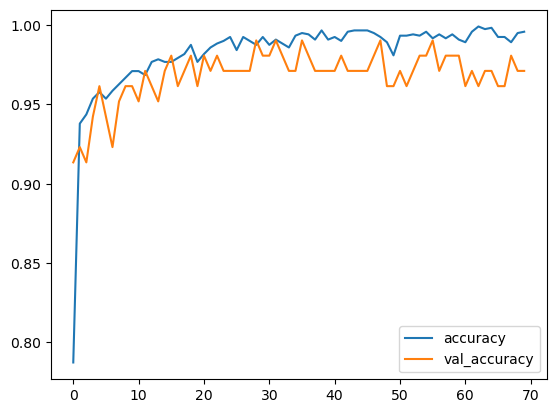

In [34]:
#resuts from model 2
plot_loss_and_accuracy(history_CNN_dropout.history)

In [36]:
pred = model_dropout.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2_dropout = [labels[k] for k in pred]

y_test_dropout = test_set.labels # set y_test to the expected output
print(classification_report(y_test_dropout, pred2_dropout))

13/13 [==============================] - 1s 53ms/step
              precision    recall  f1-score   support

   with_mask       0.98      0.97      0.98       208
without_mask       0.97      0.98      0.98       207

    accuracy                           0.98       415
   macro avg       0.98      0.98      0.98       415
weighted avg       0.98      0.98      0.98       415



In [37]:
precision_dropout = precision_score(y_test_dropout, pred2_dropout,average='macro')
precision_dropout

0.9759371951502764

In [38]:
recall_dropout = recall_score(y_test_dropout, pred2_dropout,average='macro')
recall_dropout

0.9759150873281308

In [39]:
f1_dropout = f1_score(y_test_dropout, pred2_dropout,average='macro')
f1_dropout

0.9759034745447788

<AxesSubplot:>

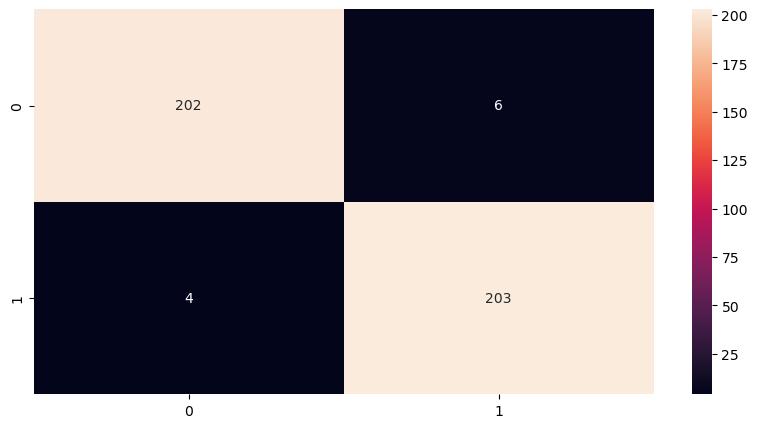

In [40]:
# model 1
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm = confusion_matrix(y_test_dropout, pred2_dropout)
sns.heatmap(cm, annot=True, fmt = 'g')

# Create a CNN Model With regularization

In [41]:
import keras
from tensorflow.keras import layers

model_regularization = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
# layer 2 with L1-L2 with Regularizers
   layers.Dense(30, activation='relu', 
                          kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01),
                          activity_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01) ),
    
    #Layer 3
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    
  #layer 4
    layers.Dense(64, activation="relu"),
   
    # Layer 5 
    layers.Dense(32, activation="relu"),
    
    # Layer 6 
    layers.Dense(2, activation='softmax')
])

model_regularization.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_regularization.optimizer.lr=0.001

model_regularization.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dense_4 (Dense)             (None, 15, 15, 30)        1950      
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 32)       

In [42]:
history_CNN_regularization = model_regularization.fit(train, validation_data= val, epochs=70,verbose=1)

Epoch 1/70
38/38 [==============================] - 7s 151ms/step - loss: 3.7222 - accuracy: 0.5240 - val_loss: 3.1239 - val_accuracy: 0.4519
Epoch 2/70
38/38 [==============================] - 5s 145ms/step - loss: 2.8731 - accuracy: 0.5232 - val_loss: 2.6268 - val_accuracy: 0.4519
Epoch 3/70
38/38 [==============================] - 5s 136ms/step - loss: 2.4056 - accuracy: 0.5232 - val_loss: 2.1946 - val_accuracy: 0.4519
Epoch 4/70
38/38 [==============================] - 6s 145ms/step - loss: 2.0019 - accuracy: 0.5232 - val_loss: 1.8316 - val_accuracy: 0.4519
Epoch 5/70
38/38 [==============================] - 5s 127ms/step - loss: 1.5982 - accuracy: 0.6325 - val_loss: 1.3610 - val_accuracy: 0.8173
Epoch 6/70
38/38 [==============================] - 5s 135ms/step - loss: 1.2220 - accuracy: 0.8212 - val_loss: 1.1747 - val_accuracy: 0.7404
Epoch 7/70
38/38 [==============================] - 5s 139ms/step - loss: 0.9438 - accuracy: 0.8576 - val_loss: 0.8300 - val_accuracy: 0.9038
Epoch 

38/38 [==============================] - 6s 146ms/step - loss: 0.0370 - accuracy: 0.9967 - val_loss: 0.1847 - val_accuracy: 0.9712
Epoch 59/70
38/38 [==============================] - 6s 156ms/step - loss: 0.0328 - accuracy: 0.9983 - val_loss: 0.2228 - val_accuracy: 0.9615
Epoch 60/70
38/38 [==============================] - 5s 139ms/step - loss: 0.0283 - accuracy: 0.9983 - val_loss: 0.1787 - val_accuracy: 0.9712
Epoch 61/70
38/38 [==============================] - 5s 137ms/step - loss: 0.0262 - accuracy: 0.9992 - val_loss: 0.1764 - val_accuracy: 0.9712
Epoch 62/70
38/38 [==============================] - 6s 146ms/step - loss: 0.0255 - accuracy: 0.9992 - val_loss: 0.1875 - val_accuracy: 0.9712
Epoch 63/70
38/38 [==============================] - 5s 142ms/step - loss: 0.0279 - accuracy: 0.9967 - val_loss: 0.2760 - val_accuracy: 0.9519
Epoch 64/70
38/38 [==============================] - 6s 152ms/step - loss: 0.0396 - accuracy: 0.9925 - val_loss: 0.2168 - val_accuracy: 0.9615
Epoch 65/70

In [ ]:
print('Final training loss \t', history_CNN_regularization.history['loss'][-1])
print('Final training accuracy ', history_CNN_regularization.history['accuracy'][-1])

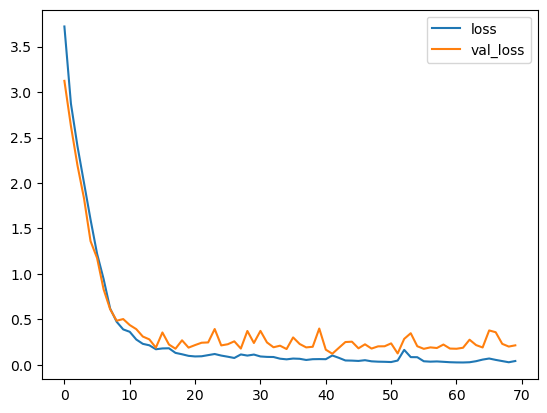

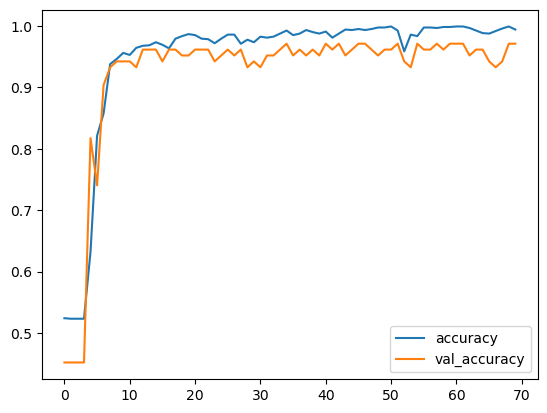

In [43]:
#resuts from model 1
plot_loss_and_accuracy(history_CNN_regularization.history)

In [44]:
pred = model_regularization.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2_regularization = [labels[k] for k in pred]

y_test_regularization = test_set.labels # set y_test to the expected output
print(classification_report(y_test_regularization, pred2_regularization))

13/13 [==============================] - 1s 66ms/step
              precision    recall  f1-score   support

   with_mask       0.96      0.95      0.95       208
without_mask       0.95      0.96      0.95       207

    accuracy                           0.95       415
   macro avg       0.95      0.95      0.95       415
weighted avg       0.95      0.95      0.95       415



In [45]:
precision_regularization = precision_score(y_test_regularization, pred2_regularization,average='macro')
precision_regularization

0.9542973286875726

In [46]:

recall_regularization = recall_score(y_test_regularization, pred2_regularization,average='macro')
recall_regularization

0.9542340208101078

In [47]:

f1_regularization = f1_score(y_test_regularization, pred2_regularization,average='macro')
f1_regularization

0.9542158041121582

<AxesSubplot:>

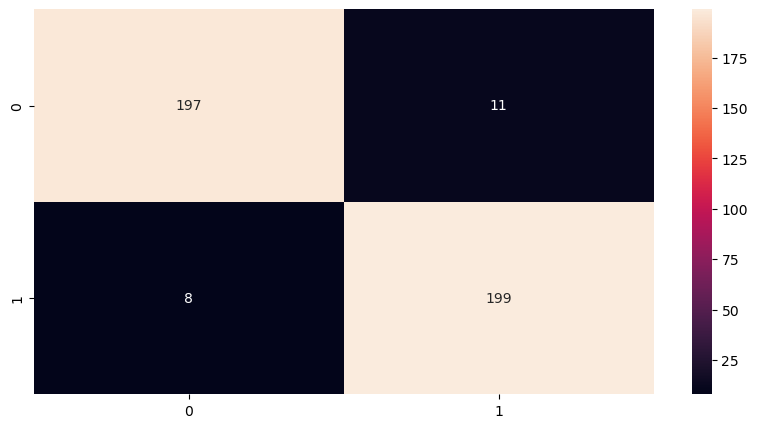

In [48]:
# model 1
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm = confusion_matrix(y_test_regularization, pred2_regularization)
sns.heatmap(cm, annot=True, fmt = 'g')

In [49]:

data = [ ('Default CNN Modle',  precision_default, recall_default, f1_default),
         (' CNN Modle with DropOut',  precision_dropout, recall_dropout, f1_dropout),
        (' CNN Modle with Regularization',  precision_regularization, recall_regularization, f1_regularization)
         ]

Scores =pd.DataFrame(data = data, columns=['Model Name', 'precision','recall','F1']) 
Scores.set_index('Model Name', inplace = True)

Scores


,precision,recall,F1
Model Name,,,
Default CNN Modle,0.959117,0.959053,0.959035
CNN Modle with DropOut,0.975937,0.975915,0.975903
CNN Modle with Regularization,0.954297,0.954234,0.954216


<AxesSubplot:xlabel='Model Name'>

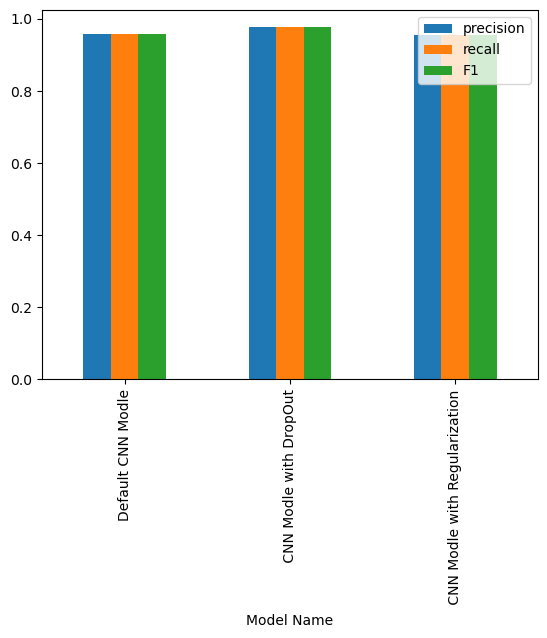

In [50]:
Scores.plot(kind='bar')